In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.datasets import mnist

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()   

print('')
print('x_train.shape = ', x_train.shape, ', t_train.shape = ', t_train.shape)
print('x_test.shape = ', x_test.shape, ', t_test.shape = ', t_test.shape)

11501568/11490434 [==============================] - 0s 0us/step

x_train.shape =  (60000, 28, 28) , t_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28) , t_test.shape =  (10000,)


In [3]:
# x_train, x_test 값 범위를 0 ~ 1 사이로 정규화

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [5]:
model = Sequential()      # model 생성

model.add(Flatten(input_shape=(28, 28)))  

model.add(Dense(100, activation='relu'))     

model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_path = './modelchpoint_test.h5'

checkpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True, mode='auto', verbose=1)

stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2, callbacks=[checkpoint, stopping])

Epoch 1/30
1487/1500 [============================>.] - ETA: 0s - loss: 0.3091 - accuracy: 0.9121
Epoch 00001: val_loss improved from inf to 0.16973, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.3084 - accuracy: 0.9121 - val_loss: 0.1697 - val_accuracy: 0.9522
Epoch 2/30
1491/1500 [============================>.] - ETA: 0s - loss: 0.1398 - accuracy: 0.9585
Epoch 00002: val_loss improved from 0.16973 to 0.11654, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1396 - accuracy: 0.9586 - val_loss: 0.1165 - val_accuracy: 0.9653
Epoch 3/30
1482/1500 [============================>.] - ETA: 0s - loss: 0.0964 - accuracy: 0.9714
Epoch 00003: val_loss improved from 0.11654 to 0.11174, saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0960 - accuracy: 0.9715 - val_loss: 0.1117 - val_accuracy: 0.9676
Epoch 4/30
1483/1500 [====

In [8]:
# test data 이용하여 정확도 검증

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9796


[0.07733476161956787, 0.9796000123023987]

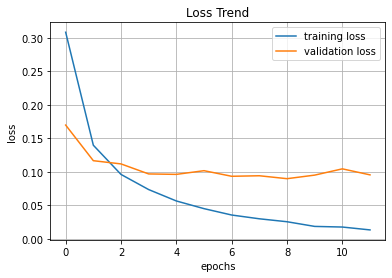

In [9]:
# 손실함수 그래프
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

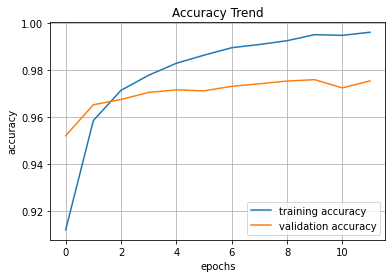

In [10]:
# 정확도 함수 그래프

plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

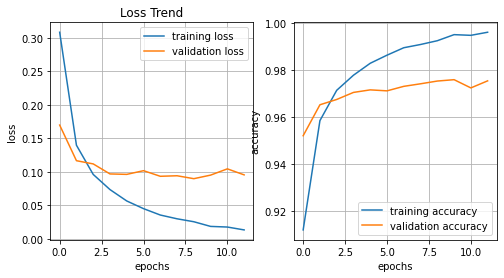

In [11]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)

plt.title('Loss Trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')


plt.subplot(1, 2, 2)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()